In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [24]:
usa_df = pd.read_csv('../data/usa_dataset.csv', parse_dates=['time','updated'])

In [25]:
usa_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-06-28 18:11:31.608000+00:00,36.471700,-115.872400,11.80,0.80,ml,15.0,180.31,0.203000,0.0658,...,2023-06-28 18:13:37.477000+00:00,"21 km WSW of Indian Springs, Nevada",earthquake,NaN,0.90,0.79,12.0,automatic,nn,nn
1,2023-06-28 18:04:05.510000+00:00,38.836166,-122.805496,1.90,0.74,md,14.0,56.00,0.012040,0.0100,...,2023-06-28 18:05:38.817000+00:00,"7km WNW of Cobb, CA",earthquake,0.33,0.80,0.15,15.0,automatic,nc,nc
2,2023-06-28 17:39:57.380000+00:00,38.851501,-122.822334,1.81,0.93,md,9.0,147.00,0.003252,0.0400,...,2023-06-28 17:58:14.272000+00:00,"9km WNW of Cobb, CA",earthquake,0.99,1.29,0.32,8.0,automatic,nc,nc
3,2023-06-28 17:37:18.132000+00:00,58.050300,-156.043400,107.50,1.20,ml,NaN,NaN,NaN,0.2700,...,2023-06-28 17:38:38.745000+00:00,"79 km SSE of King Salmon, Alaska",earthquake,NaN,2.40,NaN,NaN,automatic,ak,ak
4,2023-06-28 17:28:28.710000+00:00,38.832001,-122.817001,1.50,0.27,md,9.0,71.00,0.010150,0.0200,...,2023-06-28 17:48:16.079000+00:00,"8km NW of The Geysers, CA",earthquake,0.37,0.84,0.18,7.0,automatic,nc,nc


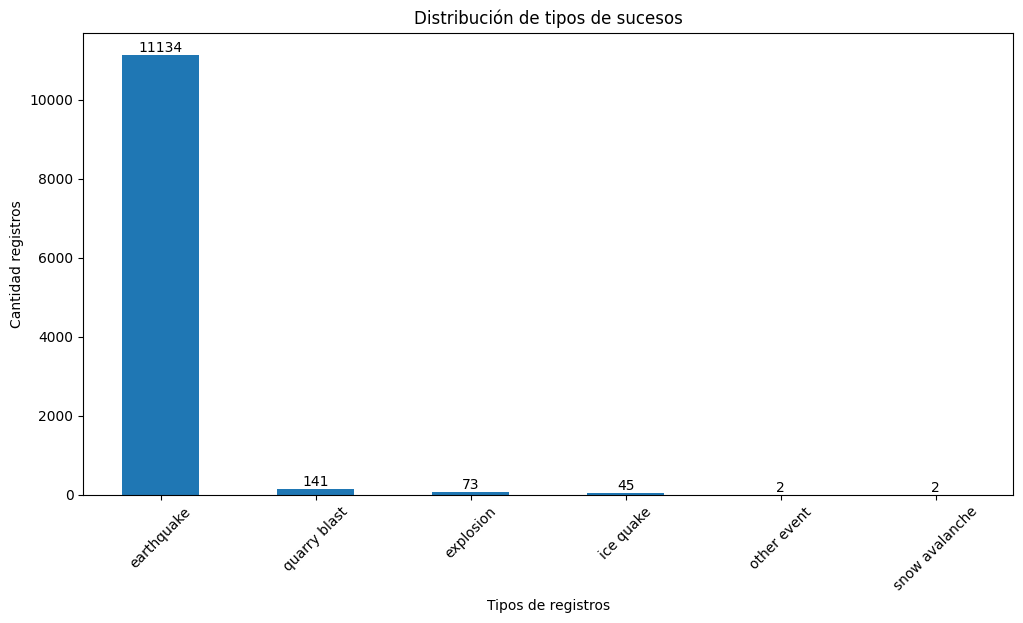

In [26]:
diff_types = usa_df['type'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
diff_types.plot(kind='bar')
plt.xlabel('Tipos de registros')
plt.ylabel('Cantidad registros')
plt.title('Distribución de tipos de sucesos')
plt.xticks(rotation=45)
# Mostrar el número de datos correspondiente al posar el mouse sobre las barras
for i, value in enumerate(diff_types):
    plt.annotate(str(value), xy=(i, value), ha='center', va='bottom')

plt.show()

Como podemos observar existen varios tipos de sucesos disponibles en la plataforma. Para nuestro objeto de estudio nos enfocaremos en unicamento los terremotos.

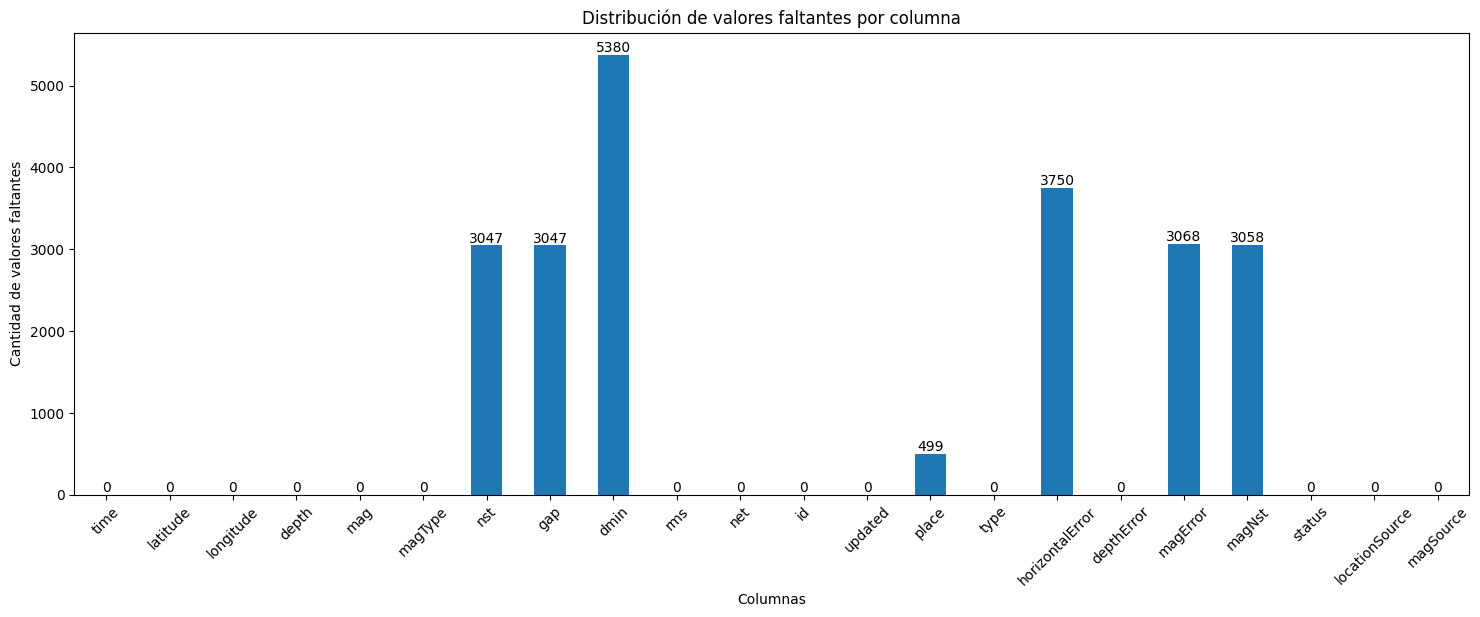

In [28]:
# Obtener el número de valores faltantes por columna
missing_values = usa_df.isna().sum()

# Crear el gráfico de barras
plt.figure(figsize=(18, 6))
missing_values.plot(kind='bar')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores faltantes')
plt.title('Distribución de valores faltantes por columna')
plt.xticks(rotation=45)
# Mostrar el número de datos correspondiente al posar el mouse sobre las barras
for i, value in enumerate(missing_values):
    plt.annotate(str(value), xy=(i, value), ha='center', va='bottom')

plt.show()

In [30]:
usa_df['locationSource'].unique()

array(['nn', 'nc', 'ak', 'ci', 'us', 'ok', 'uu', 'uw', 'hv', 'av', 'tx',
       'pr', 'mb', 'nm', 'se'], dtype=object)

In [7]:
filtered_usa_df = usa_df[['time', 'latitude', 'longitude', 'depth', 'mag', 'place']].copy()

In [8]:
filtered_usa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11397 entries, 0 to 11396
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   time       11397 non-null  datetime64[ns, UTC]
 1   latitude   11397 non-null  float64            
 2   longitude  11397 non-null  float64            
 3   depth      11397 non-null  float64            
 4   mag        11397 non-null  float64            
 5   place      10898 non-null  object             
 6   type       11397 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(4), object(2)
memory usage: 623.4+ KB


In [9]:
filtered_usa_df.isna().sum()

time           0
latitude       0
longitude      0
depth          0
mag            0
place        499
type           0
dtype: int64

In [10]:
filtered_usa_df.describe()

,latitude,longitude,depth,mag
count,11397.000000,11397.000000,11397.000000,11397.000000
mean,42.861508,-118.585088,23.116026,1.467446
std,19.340285,71.204068,52.230116,1.252541
min,-62.324600,-179.984900,-3.200000,-1.590000
25%,35.136500,-155.142500,2.600000,0.700000
50%,44.271800,-123.427667,7.690000,1.250000
75%,58.222667,-116.801500,18.100000,1.930000
max,85.038000,179.958400,630.838000,7.200000


In [13]:
filtered_usa_df.query("mag < 0 or depth < 0")['type'].value_counts()

type
earthquake        1252
quarry blast        97
explosion           34
snow avalanche       2
other event          1
Name: count, dtype: int64

In [32]:
filtered_usa_df.loc[filtered_usa_df['depth'].idxmin()]

time         2023-06-08 05:55:52.480000+00:00
latitude                            52.385833
longitude                         -174.154167
depth                                    -3.2
mag                                      0.42
place                 21 km N of Atka, Alaska
type                               earthquake
Name: 7068, dtype: object